<h1><center><font size=10>Easy Visa Project 3</center></font></h1>


<b><h2><center>Visa Approval Prediction</center></h2></b>

## Problem statement


### Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval.

* Facilitate the process of visa approvals.

* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

## Data Description


The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
* case_status: Flag indicating if the Visa was certified or denied

### Importing necessary libraries

In [165]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer
from sklearn import metrics

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
import warnings

warnings.filterwarnings("ignore")

### Loading the dataset

In [166]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

# loading data into a pandas dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Project3/EasyVisa.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Data Overview

In [167]:
# Creating a copy of the data
data=df.copy()

In [168]:
# Checking the number of rows and columns
data.shape

(25480, 12)

The dataset has 25480 rows and 12 columns.

In [169]:
# checking top 5 rows of the data
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.203,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.650,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.860,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.030,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.390,Year,Y,Certified


In [170]:
# checking the bottom 5 rows of the data
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.570,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.790,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.850,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.770,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.910,Year,Y,Certified


### Checking the data types of the columns

In [171]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


* There are  no null values in any of the columns
* Only 3 columns are of numerical type, rest are all object type.

### Checking for duplicate values

In [172]:
# Check for duplicate values in data
data.duplicated().sum()

np.int64(0)

There are no duplicate values in data.

### Checking for null values


In [173]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


There are no null values in these columns

 ### Checking the statistical summary of the numerical columns in the data


In [174]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.000,5667.043,22877.929,-26.000,1022.000,2109.000,3504.000,602069.000
yr_of_estab,25480.000,1979.410,42.367,1800.000,1976.000,1997.000,2005.000,2016.000
prevailing_wage,25480.000,74455.815,52815.942,2.137,34015.480,70308.210,107735.513,319210.270


* There are negative values of number of employees in the dataset, which needs to be imputed.
* The prevaling wage data needs to be normalized. The min value of 2 dollar implies that we need to normalize the data to annual wage.

In [ ]:
negative_count = (data['no_of_employees'] < 0).sum()
print("Number of values with negative no of employee count ", negative_count)

Number of values with negative no of employee count  33


In [ ]:
# list of all categorical variables
cat_cols = data.select_dtypes(include=['object', 'category']).columns

# printing the number of occurrences of each unique value in each categorical column
for column in cat_cols:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)

case_id
EZYV25480   0.000
EZYV01      0.000
EZYV02      0.000
EZYV03      0.000
EZYV04      0.000
             ... 
EZYV13      0.000
EZYV12      0.000
EZYV11      0.000
EZYV10      0.000
EZYV09      0.000
Name: proportion, Length: 25480, dtype: float64
--------------------------------------------------
continent
Asia            0.662
Europe          0.146
North America   0.129
South America   0.033
Africa          0.022
Oceania         0.008
Name: proportion, dtype: float64
--------------------------------------------------
education_of_employee
Bachelor's    0.402
Master's      0.378
High School   0.134
Doctorate     0.086
Name: proportion, dtype: float64
--------------------------------------------------
has_job_experience
Y   0.581
N   0.419
Name: proportion, dtype: float64
--------------------------------------------------
requires_job_training
N   0.884
Y   0.116
Name: proportion, dtype: float64
--------------------------------------------------
region_of_employment
Northeast   0

In [ ]:
#Case ID is unique for each case and may not add value to modelling. Hence will remove the column

data.drop(["case_id"], axis=1, inplace=True)

Negative value imputation will be done after splitting the data into train, test
and validation to avoid data leakage

## Exploratory Data Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
### Function to plot distributions
def distribution_plot_wrt_Visa_status(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    # First subplot: Distribution for target = value[0]
    axs[0, 0].set_title("Distribution of " + predictor + " for Visa status = " + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal"
    )
    axs[0, 0].tick_params(axis='x', rotation=90, labelsize=12)

    # Second subplot: Distribution for target = value[1]
    axs[0, 1].set_title("Distribution of " + predictor + " for Visa status = " + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange"
    )
    axs[0, 1].tick_params(axis='x', rotation=90, labelsize=12)

    # Third subplot: Boxplot with outliers
    axs[1, 0].set_title("Boxplot w.r.t Visa status")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")
    axs[1, 0].tick_params(axis='x', rotation=90, labelsize=12)

    # Fourth subplot: Boxplot without outliers
    axs[1, 1].set_title("Boxplot (without outliers) w.r.t Visa status")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow"
    )
    axs[1, 1].tick_params(axis='x', rotation=90, labelsize=12)

    plt.tight_layout()
    plt.show()

## Univariate Analysis

Plotting for: no_of_employees
Plotting for: yr_of_estab
Plotting for: prevailing_wage


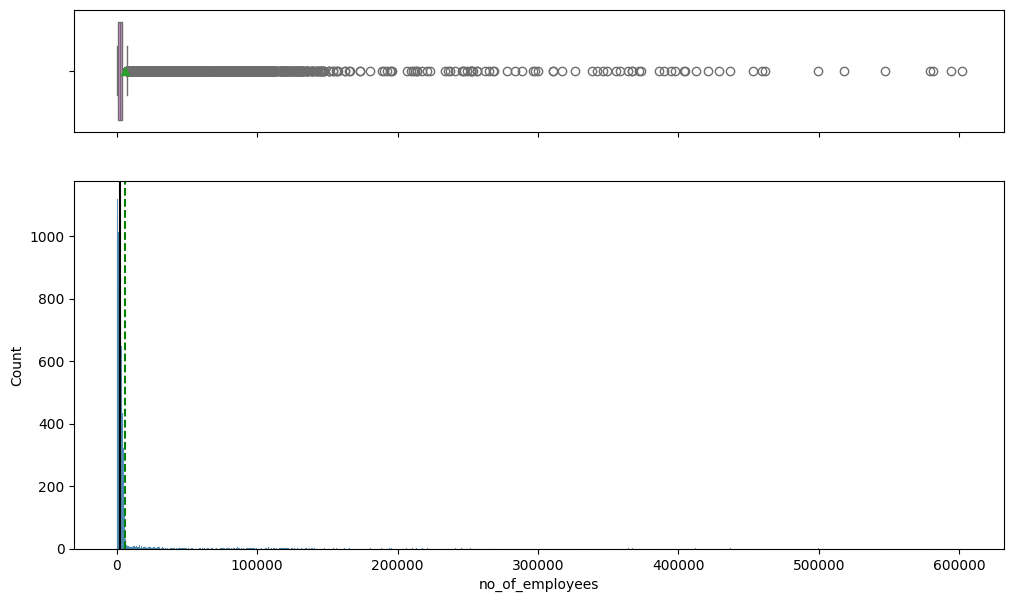

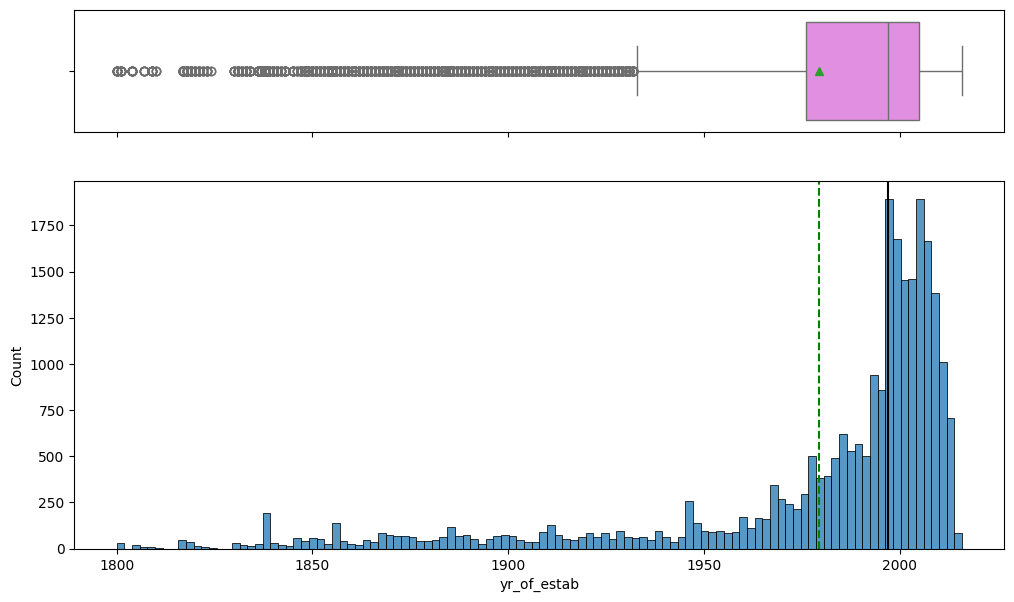

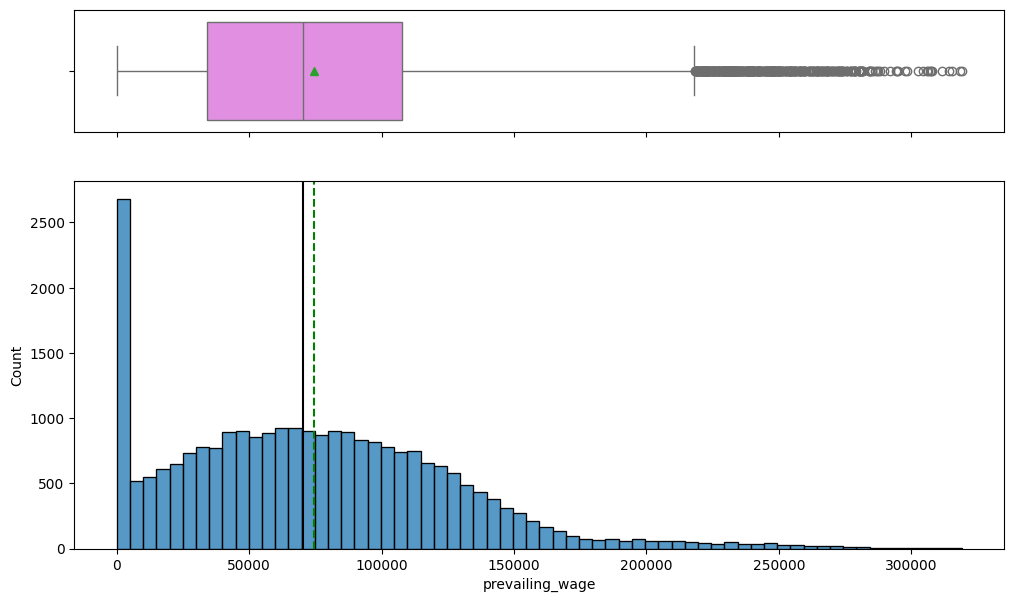

In [175]:
# Columns to visualize
numerical_columns = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

# Loop through columns
for col in numerical_columns:
    print(f"Plotting for: {col}")
    histogram_boxplot(df, feature=col)

* The no of employees field has a lot of outliers. This must be because some big companies have large number of employees.The median value of number of employees is around 2100. A few negative values are there for  number of employees which needs to be imputed later. The number of employees feature is highly rightly skewed.

* The year of establishment indicates the trend that more new companies are entering the market and applying for visas.

* The prevaling wage data needs to normalized.



Plotting for column: continent


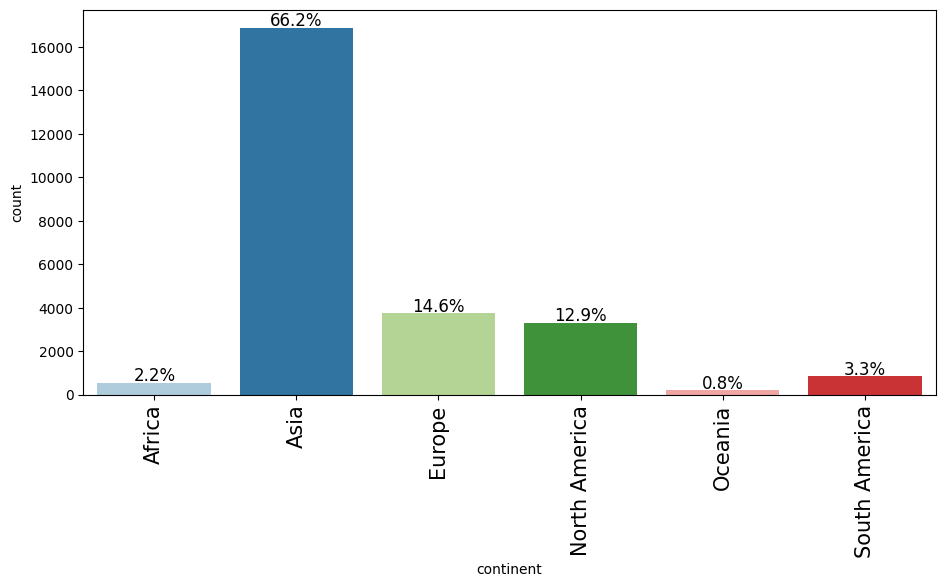

Plotting for column: education_of_employee


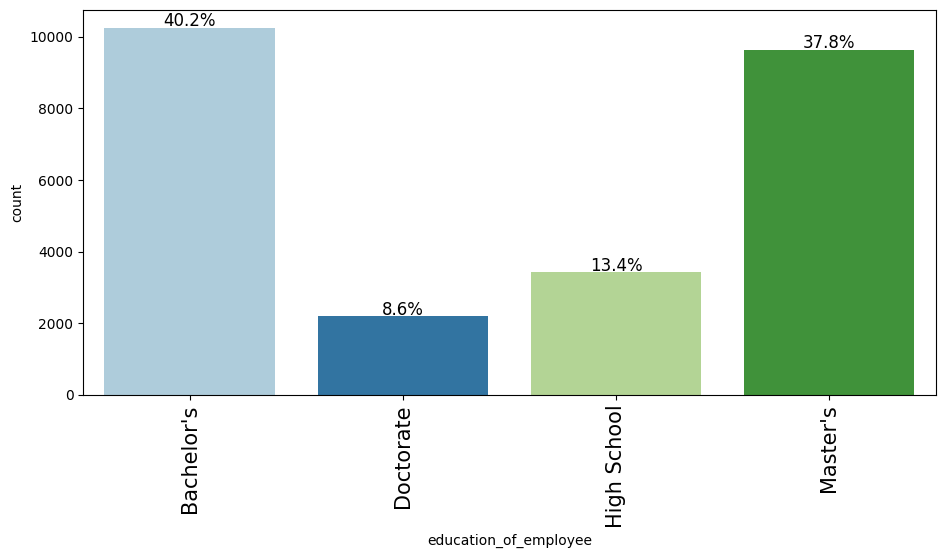

Plotting for column: has_job_experience


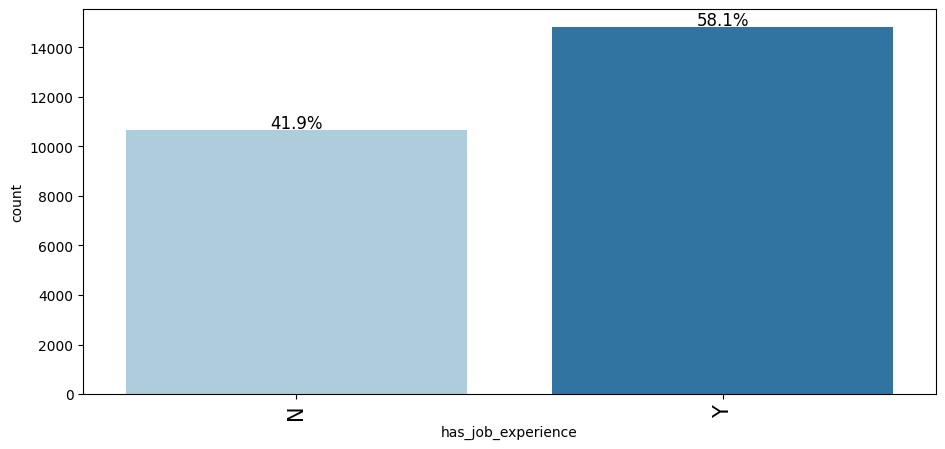

Plotting for column: requires_job_training


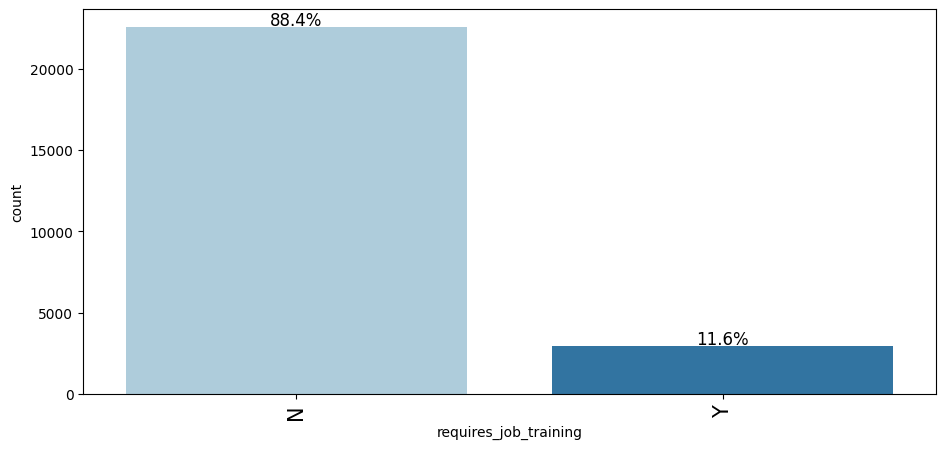

Plotting for column: region_of_employment


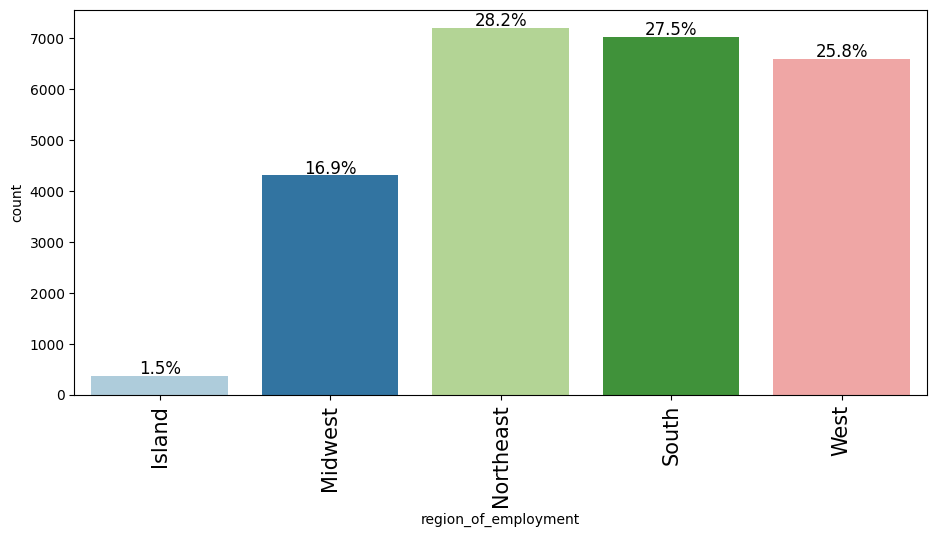

Plotting for column: unit_of_wage


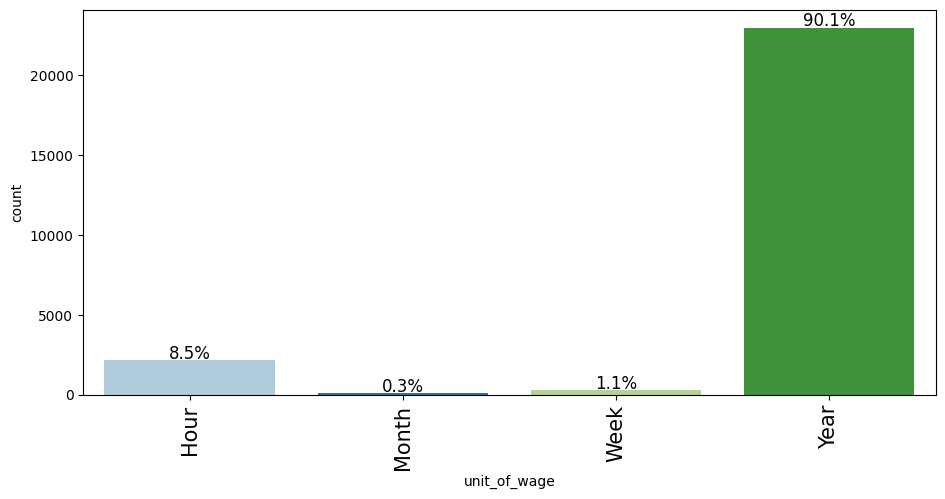

Plotting for column: full_time_position


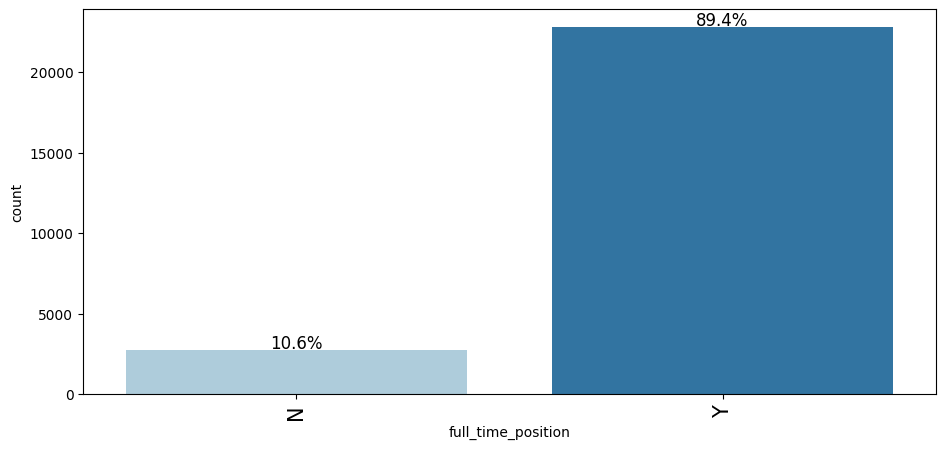

Plotting for column: case_status


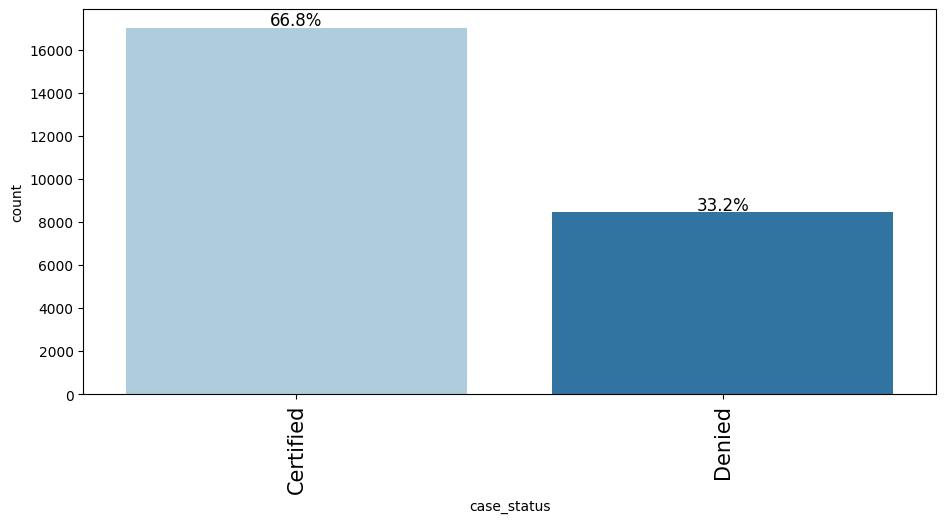

In [ ]:
# list of all categorical variables
cat_cols2 = data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols2:
    print(f"Plotting for column: {col}")
    labeled_barplot(data=data, feature=col, perc=True, n=10)

* Most of the employees are from Asia and the second most employees are from Europe.

* Around 90 percent of employees are applying for a full time position

* Around 88 percent of employees dont require any job training.

* Around 58 percent of employees have job experience

* Around 40 percent employees have bachelor's degree, around 37 percent employees have masters degree and only 8.6 percent have doctorate degrees

* North east region seems to be employing 28 percent of the employees .

* Almost 67 percent of the employee applications are certified for Visa and around 33 percent are rejected.

## Bivariate Analysis

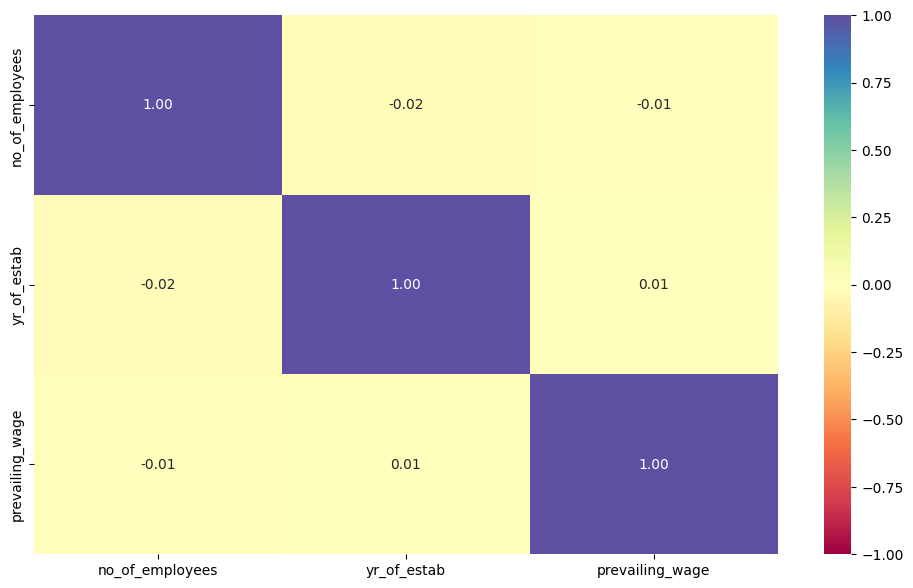

In [ ]:
# defining the size of the plot
plt.figure(figsize=(12, 7))

# plotting the heatmap for correlation
sns.heatmap(
    data[numerical_columns].corr(),annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
);

<Figure size 1200x800 with 0 Axes>

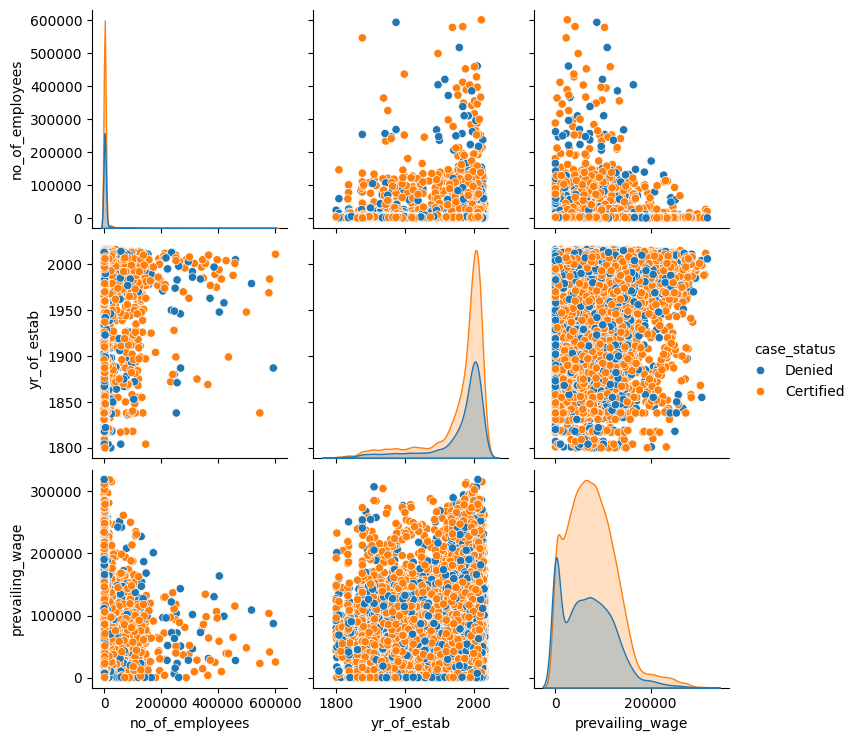

In [ ]:
# Scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(data, vars=numerical_columns, hue='case_status', diag_kind='kde');

* There is no strong co-relation between the numerical varaibles

####Plotting distribution plot with respect to Visa status

Plotting for column: continent


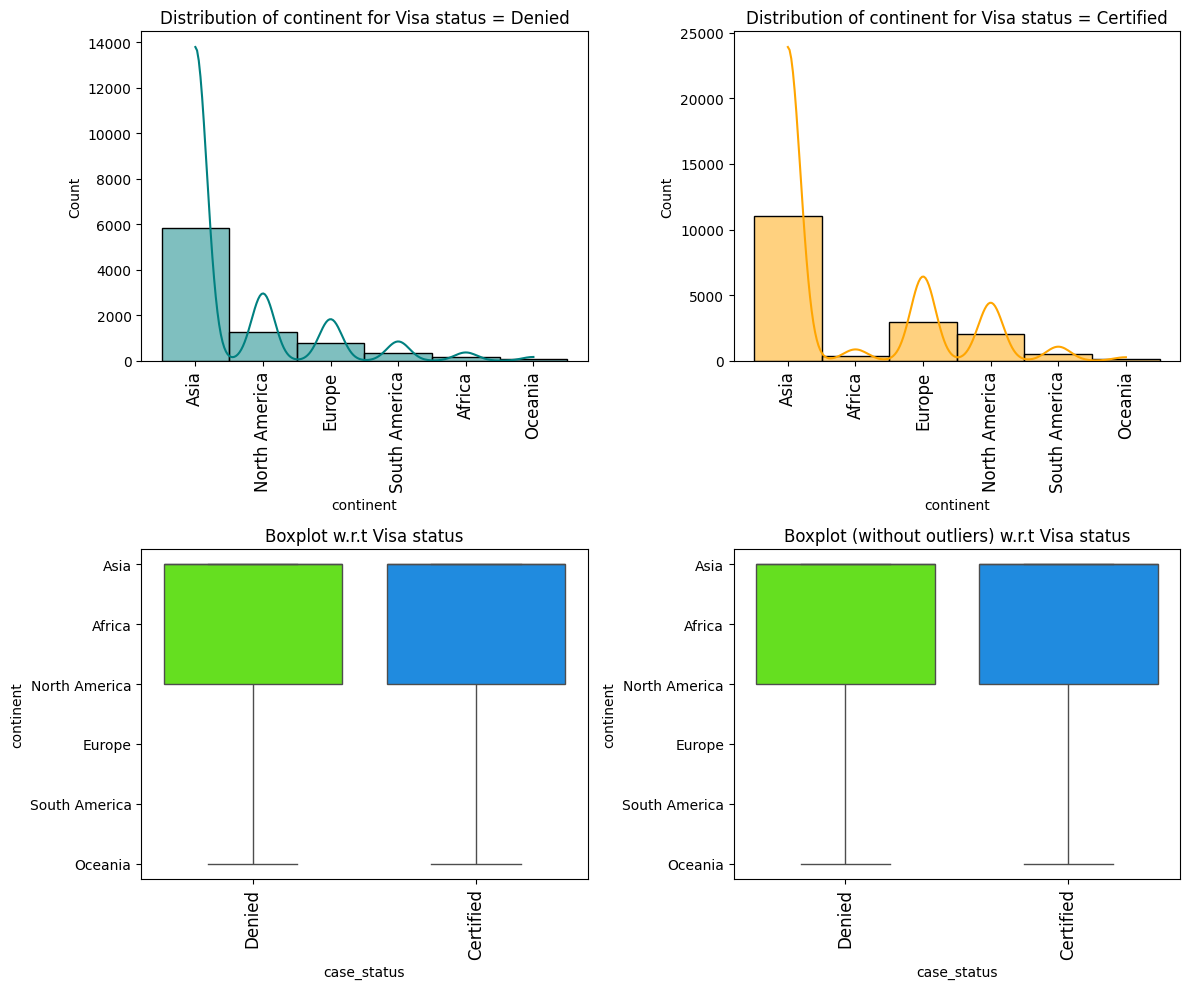

Plotting for column: education_of_employee


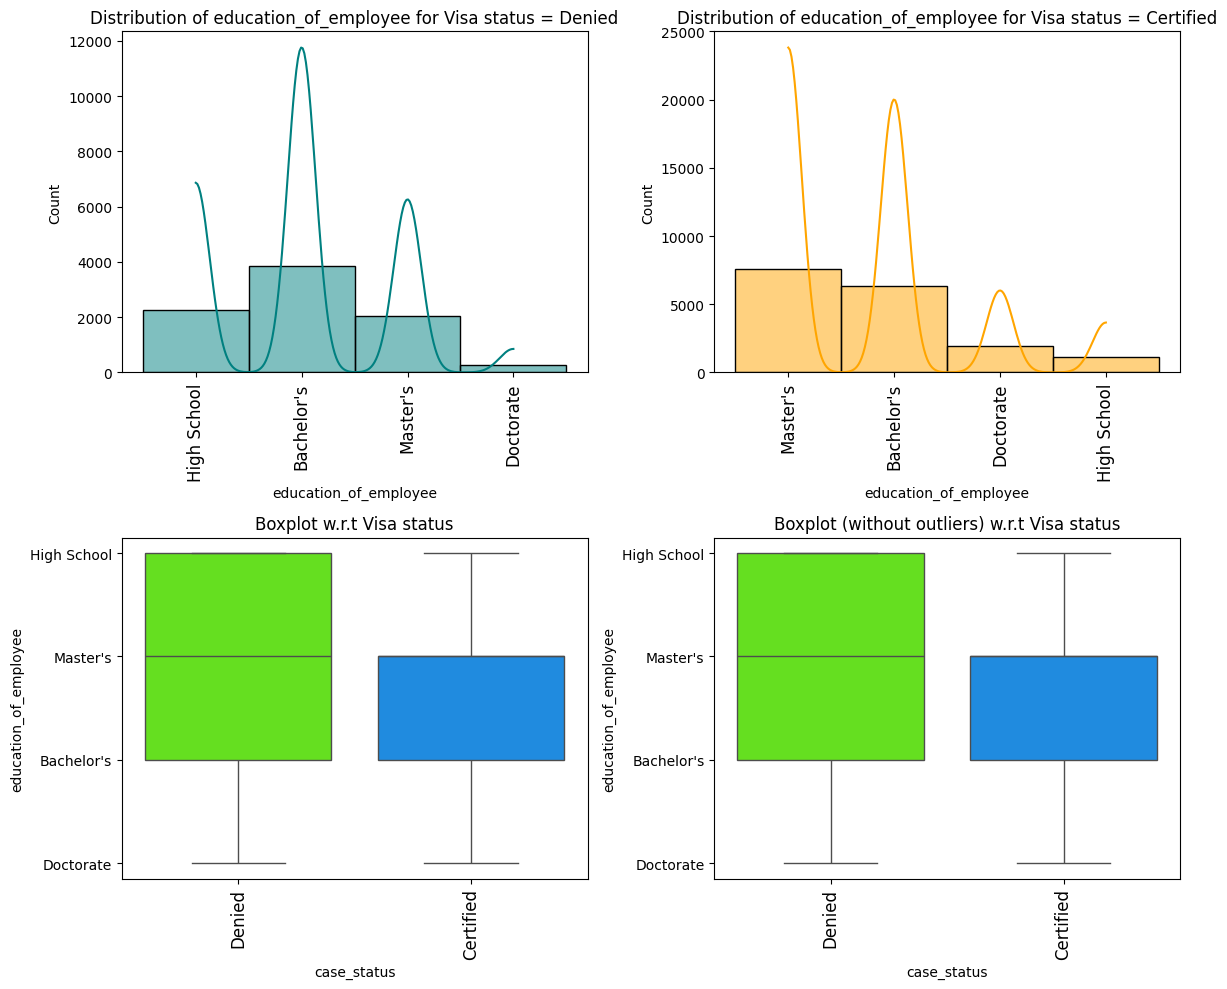

Plotting for column: has_job_experience


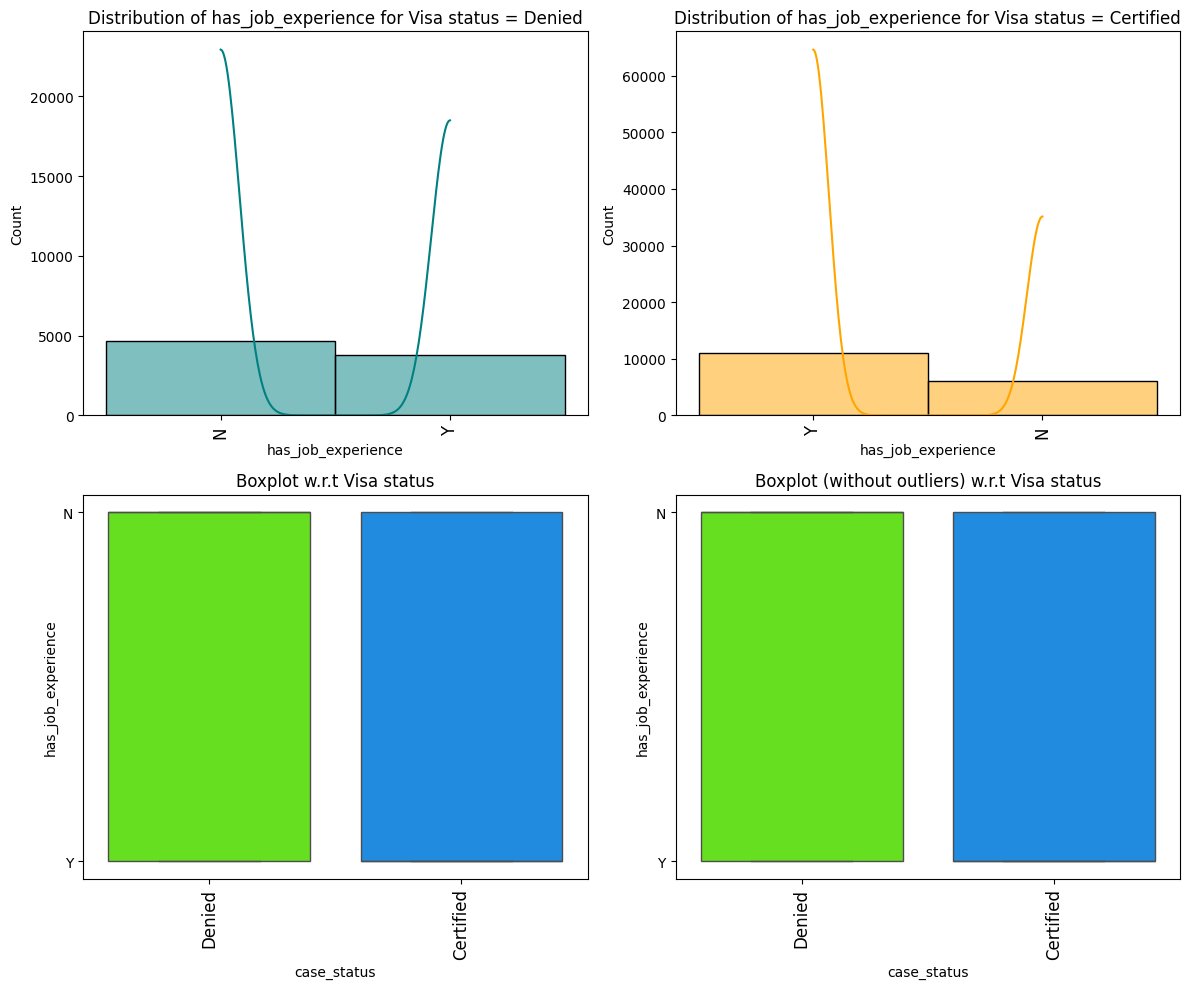

Plotting for column: requires_job_training


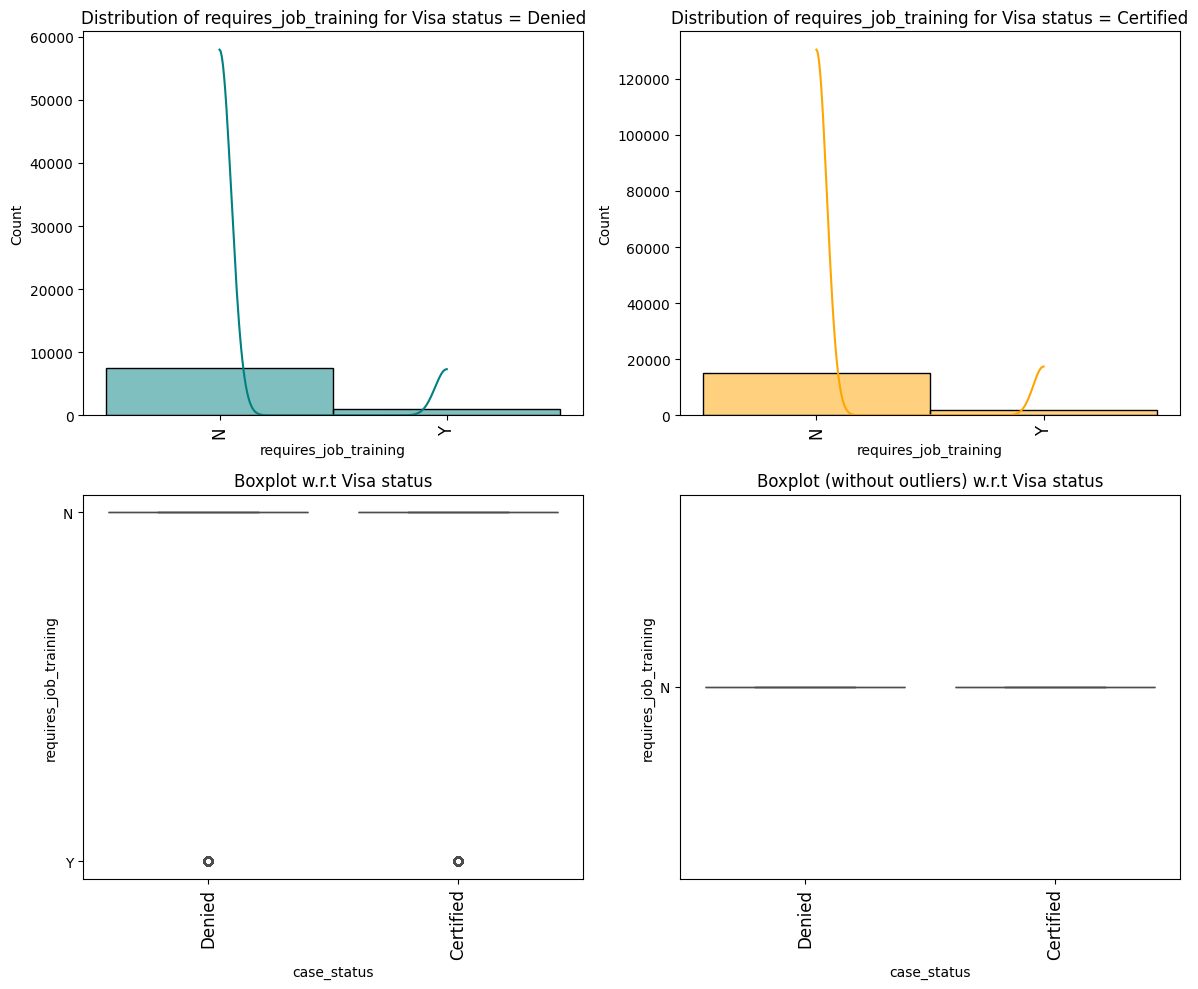

Plotting for column: region_of_employment


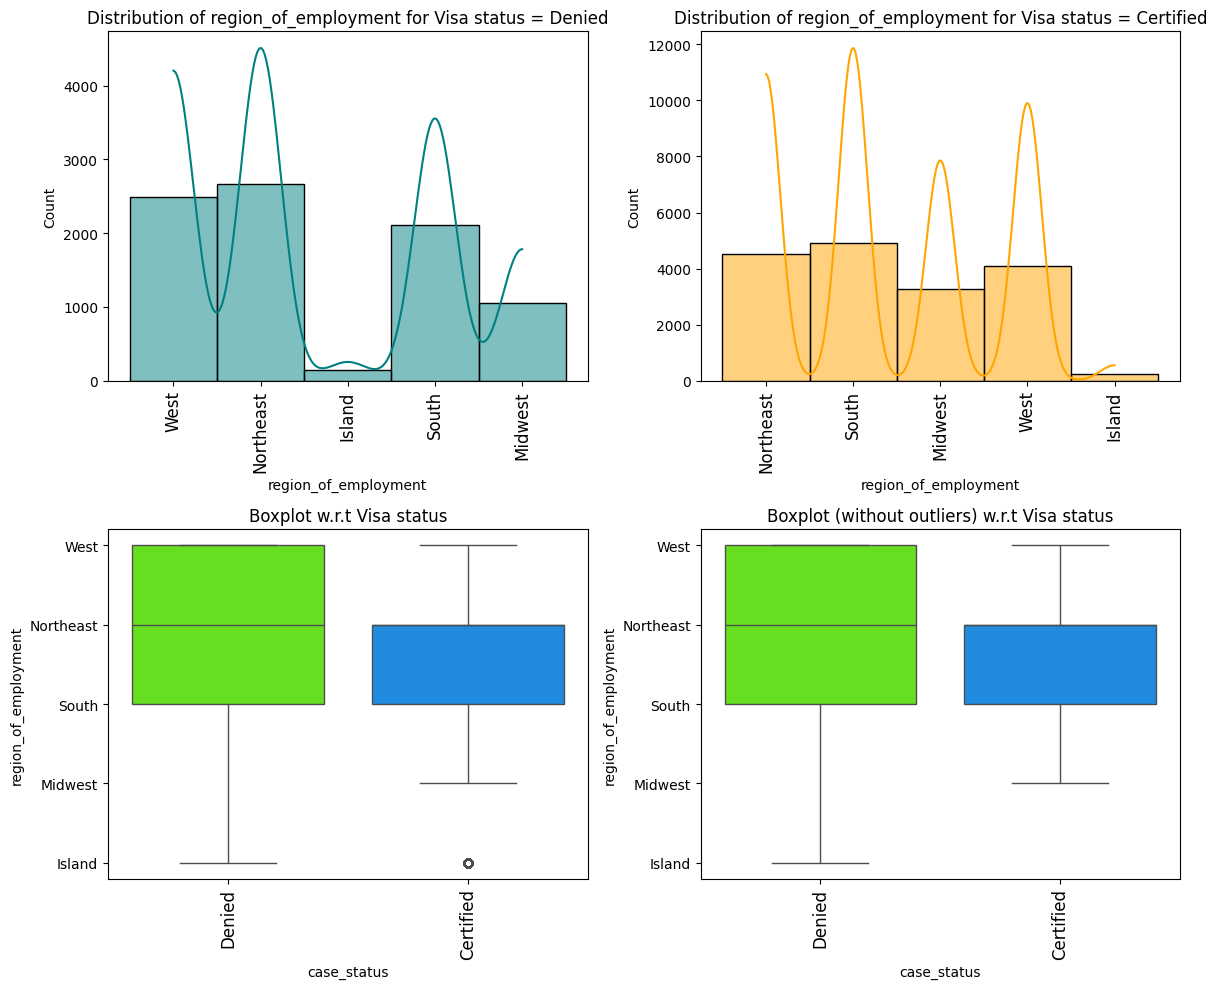

Plotting for column: unit_of_wage


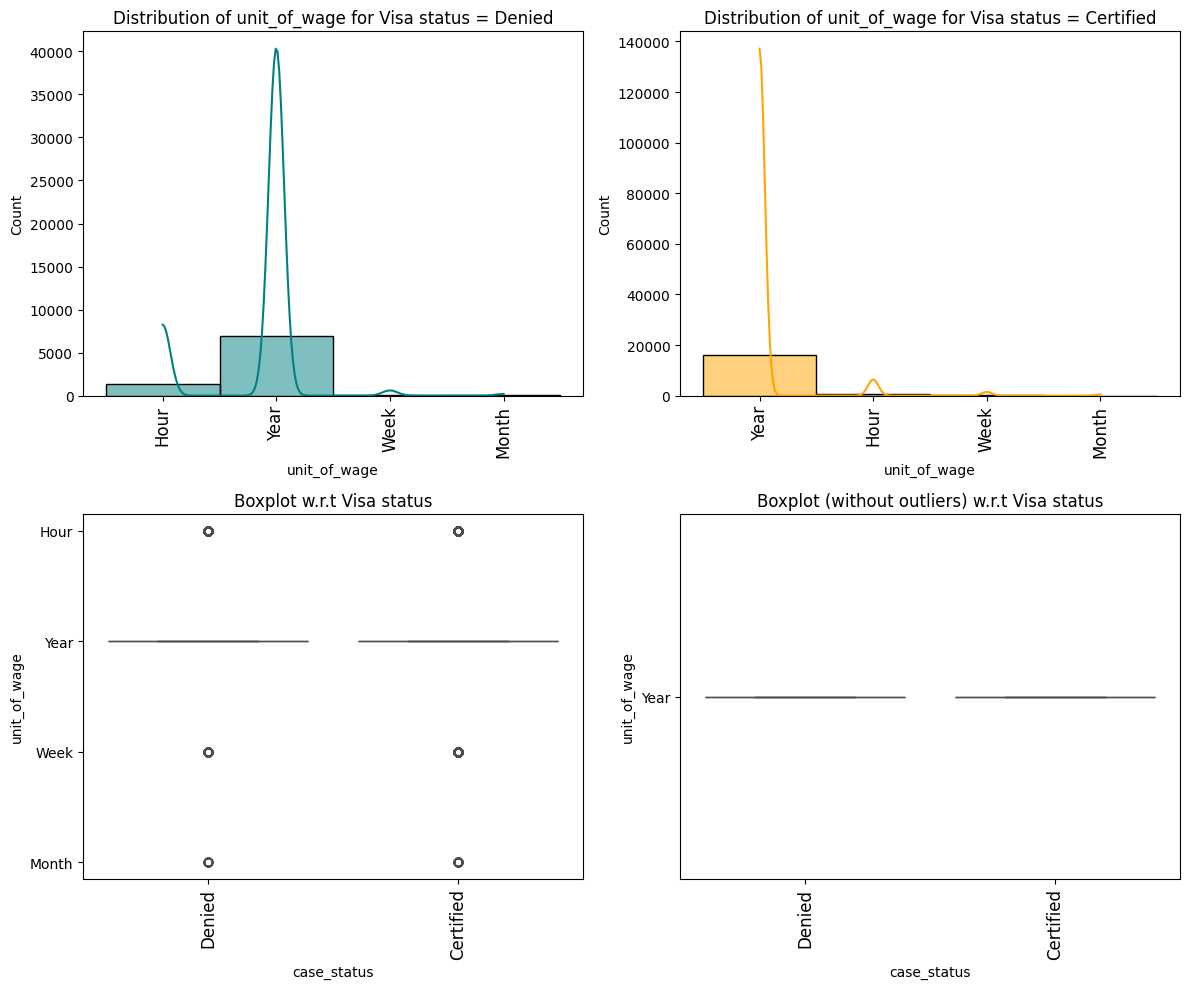

Plotting for column: full_time_position


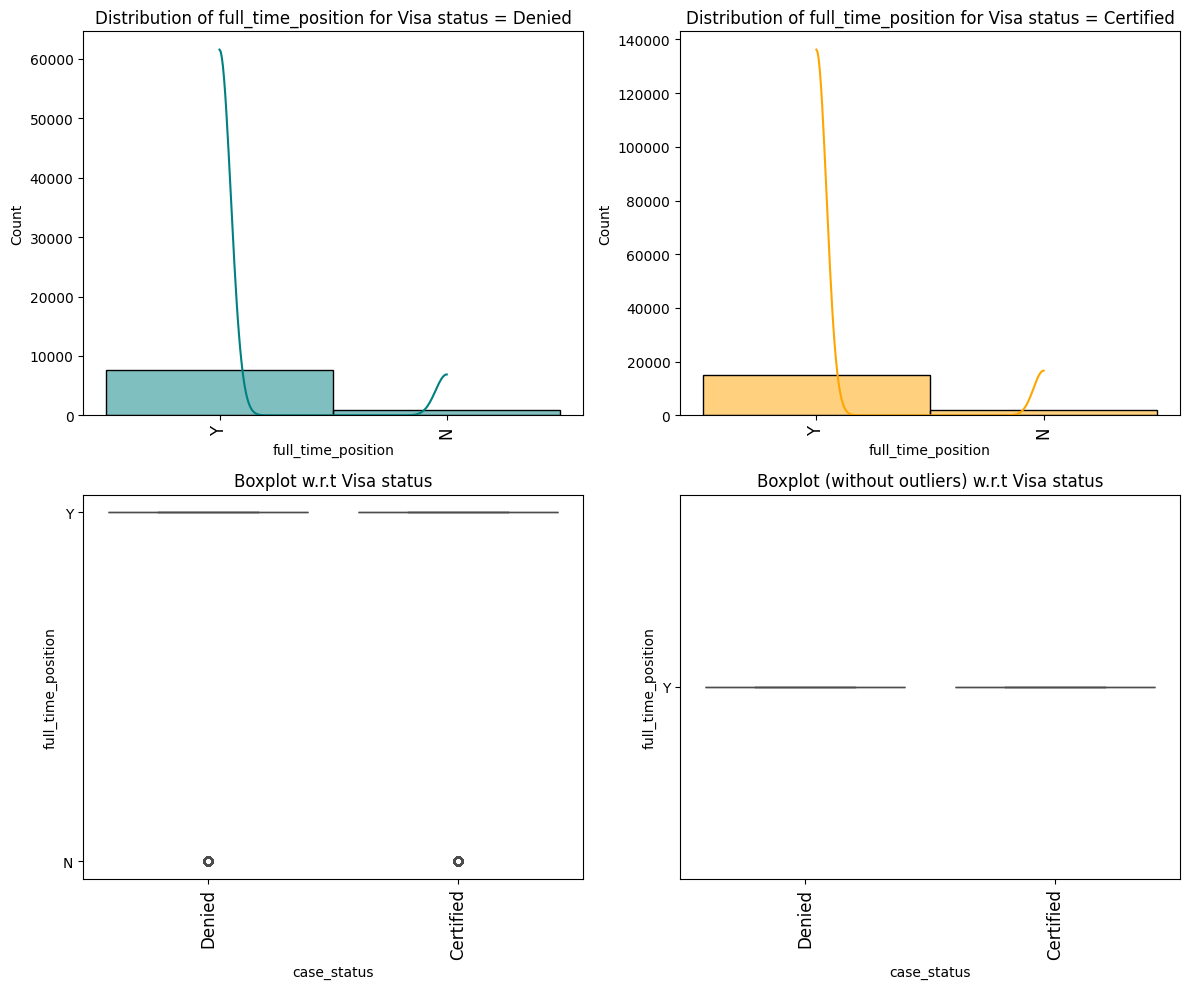

Plotting for column: case_status


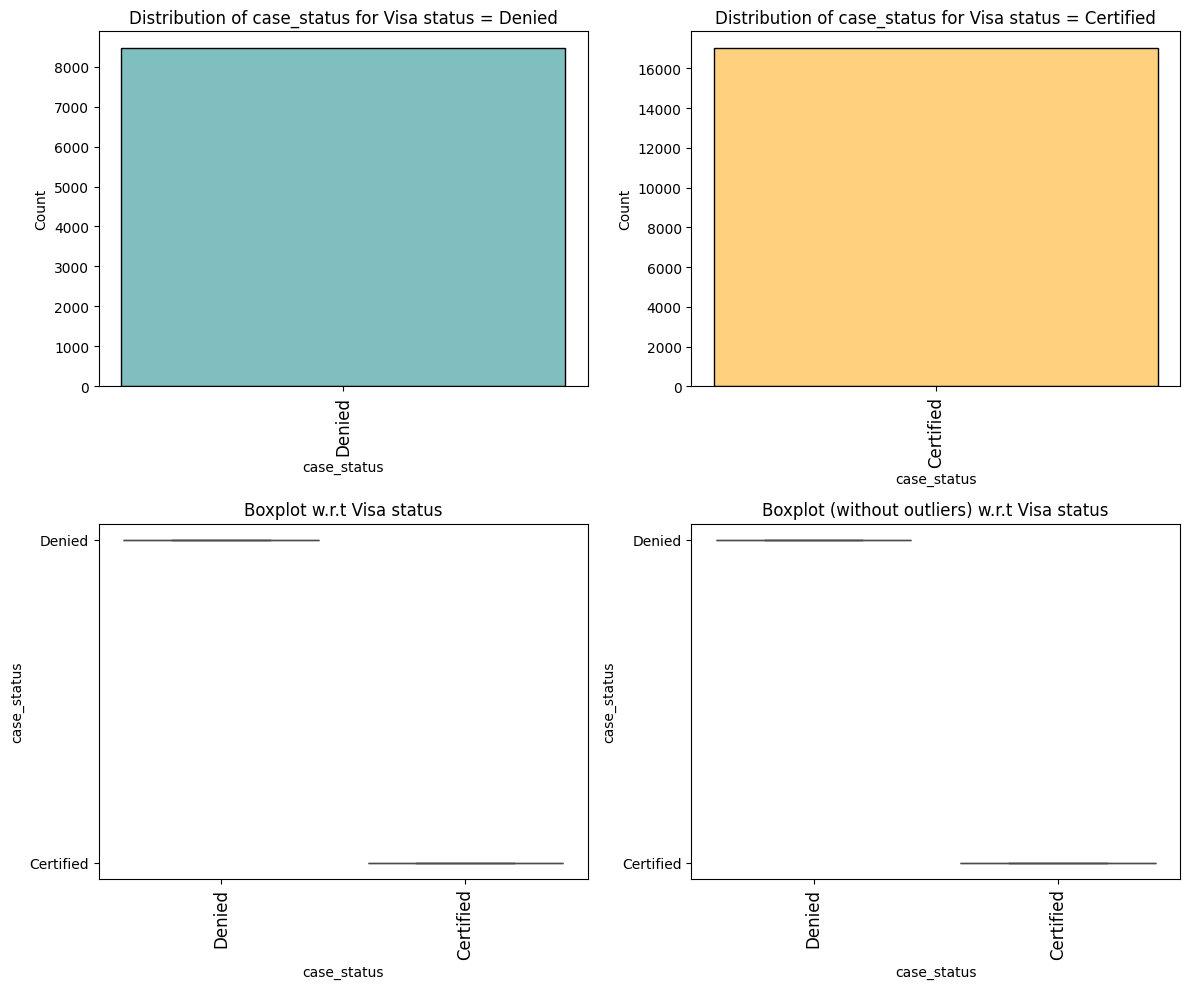

In [ ]:
for col in cat_cols2:
    print(f"Plotting for column: {col}")
    distribution_plot_wrt_Visa_status(data,col,"case_status")

* Asia is the primary contributor to both certified and denied visa applications


## Data Preprocessing

In [ ]:
data1 = data.copy()

Need to normalize wage to annual wage

In [ ]:
def normalize_wage(row):
    if row['unit_of_wage'] == 'Hour':
        return row['prevailing_wage'] * 40 * 52
    elif row['unit_of_wage'] == 'Week':
        return row['prevailing_wage'] * 52
    elif row['unit_of_wage'] == 'Month':
        return row['prevailing_wage'] * 12
    elif row['unit_of_wage'] == 'Year':
        return row['prevailing_wage']
    else:
        return np.nan  # Or handle unknowns

In [ ]:
data1['normalized_wage'] = data1.apply(normalize_wage, axis=1)

In [ ]:
## We can drop prevailing_wage and unit_of_wage column
data1.drop(["prevailing_wage"], axis=1, inplace=True)
data1.drop(["unit_of_wage"], axis=1, inplace=True)

In [ ]:
data1.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,full_time_position,case_status,normalized_wage
0,Asia,High School,N,N,14513,2007,West,Y,Denied,1231782.032
1,Asia,Master's,Y,N,2412,2002,Northeast,Y,Certified,83425.650
2,Asia,Bachelor's,N,Y,44444,2008,West,Y,Denied,122996.860
3,Asia,Bachelor's,N,N,98,1897,West,Y,Denied,83434.030
4,Africa,Master's,Y,N,1082,2005,South,Y,Certified,149907.390


## Data Preparation for Modeling

In [ ]:
X = data1.drop(["case_status"], axis=1)
y = data1["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

In [ ]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(15288, 9) (5096, 9) (5096, 9)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


## Missing Value Treatment

In [ ]:
data1.isnull().sum()

,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
full_time_position,0
case_status,0
normalized_wage,0


Although there are no missing values , there are some negative values in number of employees which needs to be imputed.

In [ ]:
##Calculate median number of employees of valid non-negative values from train set

median_emp = X_train[X_train['no_of_employees'] >= 0]['no_of_employees'].median()

#  Replace negative values in train, test, and validation sets using this median
X_train.loc[X_train['no_of_employees'] < 0, 'no_of_employees'] = median_emp
X_test.loc[X_test['no_of_employees'] < 0, 'no_of_employees'] = median_emp
X_val.loc[X_val['no_of_employees'] < 0, 'no_of_employees'] = median_emp

In [ ]:
median_emp

2105.0

## Creating dummy variables

In [ ]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.astype(float)

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.astype(float)

print(X_train.shape, X_val.shape, X_test.shape)

(15288, 18) (5096, 18) (5096, 18)


After encoding there are 18 columns

## Model Building

### Model Evaluation Criterion

* We want minimize wrongly denying a good candidate. Hence we want to maximize recall_score.
* We dont want to recommend unqualified applicants as likely to be certified. so need to maximise precision also
* Hence we want to maximise  precision and recall using F1 Score, especially for the Certified class.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf


In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Initial Model Building


In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\nTraining Performance (f1 score):\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = f1_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

print("\nValidation Performance (f1 score):\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance (f1 score):

Bagging: 0.989006674519042
Random forest: 1.0
GBM: 0.8250404250404251
Adaboost: 0.8187852788439829
dtree: 1.0

Validation Performance (f1 score):

Bagging: 0.7760629004076878
Random forest: 0.8003376952300548
GBM: 0.8208478109798472
Adaboost: 0.8153783453335145
dtree: 0.7429158713845251


In [ ]:
print("\nTraining and Validation Performance Difference (Original Data):\n")


for name, model in models:
    model.fit(X_train, y_train)
    scores_train = f1_score(y_train, model.predict(X_train))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference (Original Data):

Bagging: Training Score: 0.9890, Validation Score: 0.7761, Difference: 0.2129
Random forest: Training Score: 1.0000, Validation Score: 0.8003, Difference: 0.1997
GBM: Training Score: 0.8250, Validation Score: 0.8208, Difference: 0.0042
Adaboost: Training Score: 0.8188, Validation Score: 0.8154, Difference: 0.0034
dtree: Training Score: 1.0000, Validation Score: 0.7429, Difference: 0.2571


GBM has the best performance follwed by adaboost

## Model Building - Oversampled Data


In [ ]:
print("Before Oversampling, counts of label 'Certified': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'Denied': {} \n".format(sum(y_train == 0)))

Before Oversampling, counts of label 'Certified': 10210
Before Oversampling, counts of label 'Denied': 5078 



In [ ]:
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


In [ ]:

print("After Oversampling, counts of label 'Certified': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'Denied': {} \n".format(sum(y_train_over == 0)))

After Oversampling, counts of label 'Certified': 10210
After Oversampling, counts of label 'Denied': 10210 



In [ ]:
print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

After Oversampling, the shape of train_X: (20420, 18)
After Oversampling, the shape of train_y: (20420,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9875147463625639
Random forest: 0.9999510308016257
GBM: 0.8191190253045924
Adaboost: 0.8044324925816023
dtree: 1.0

Validation Performance:

Bagging: 0.7702981989961618
Random forest: 0.7962462675956207
GBM: 0.8170731707317073
Adaboost: 0.8062605752961083
dtree: 0.742687453600594


In [ ]:
print("\nTraining and Validation Performance Difference:(Oversampled data)\n")


for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = f1_score(y_train_over, model.predict(X_train_over))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:(Oversampled data)

Bagging: Training Score: 0.9875, Validation Score: 0.7703, Difference: 0.2172
Random forest: Training Score: 1.0000, Validation Score: 0.7962, Difference: 0.2037
GBM: Training Score: 0.8191, Validation Score: 0.8171, Difference: 0.0020
Adaboost: Training Score: 0.8044, Validation Score: 0.8063, Difference: -0.0018
dtree: Training Score: 1.0000, Validation Score: 0.7427, Difference: 0.2573


GBM has the best performance on validation followed by Adaboost in oversampled data

### Model Building - Undersampled Data

In [ ]:
rus = RandomUnderSampler(random_state=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [ ]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10210
Before Under Sampling, counts of label 'No': 5078 

After Under Sampling, counts of label 'Yes': 5078
After Under Sampling, counts of label 'No': 5078 

After Under Sampling, the shape of train_X: (10156, 18)
After Under Sampling, the shape of train_y: (10156,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))


print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = f1_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9786256492209349
Random forest: 1.0
GBM: 0.7263451727789008
Adaboost: 0.6942084187908976
dtree: 1.0

Validation Performance:

Bagging: 0.6987788331071914
Random forest: 0.7368250364845144
GBM: 0.7727486296006265
Adaboost: 0.756979695431472
dtree: 0.6856395158652273


In [ ]:
print("\nTraining and Validation Performance Difference: (Undersampled data) \n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = f1_score(y_train_un, model.predict(X_train_un))
    scores_val = f1_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference: (Undersampled data) 

Bagging: Training Score: 0.9786, Validation Score: 0.6988, Difference: 0.2798
Random forest: Training Score: 1.0000, Validation Score: 0.7368, Difference: 0.2632
GBM: Training Score: 0.7263, Validation Score: 0.7727, Difference: -0.0464
Adaboost: Training Score: 0.6942, Validation Score: 0.7570, Difference: -0.0628
dtree: Training Score: 1.0000, Validation Score: 0.6856, Difference: 0.3144


* GBM has the best performance followed by Adaboost in  oversampled and undersampled data

* Decision tree , Bagging and random forest are consistently overfitting.

* Out of the 15 models, we will select GBM and Adaboost models in undersampled data as well as GBM in oversampled data for further tuning. These models have good f1 scores, have a good balance between training and validation data.


## Hyperparameter Tuning

### Tuning AdaBoostClassifier model with Undersampled data

In [ ]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(10, 40, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(10), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score=0.9312726426438074:


In [ ]:
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
)
tuned_adb.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [ ]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb, X_train_un, y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.598,0.931,0.559,0.698


In [ ]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.716,0.934,0.722,0.815


## Tuning Gradient Boosting model with Undersampled Data

In [ ]:
#Creating pipeline
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(125,175,25),
    "learning_rate": [0.01, 0.2, 0.05, 1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1, 'n_estimators': np.int64(150), 'max_features': 0.5, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.7353316395795353:


In [ ]:
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=1,
    n_estimators=150,
    max_features=0.5,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm1.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=1)

In [ ]:
# Checking model's performance on training set
gbm1_train = model_performance_classification_sklearn(
    tuned_gbm1, X_train_un, y_train_un
)
gbm1_train

,Accuracy,Recall,Precision,F1
0,0.682,0.835,0.640,0.724


In [ ]:
# Checking model's performance on validation set
gbm1_val = model_performance_classification_sklearn(tuned_gbm1, X_val, y_val)
gbm1_val

,Accuracy,Recall,Precision,F1
0,0.734,0.828,0.785,0.806


## Tuning Gradient Boosting model with Oversampled data

In [ ]:

#defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "subsample":[0.5,0.7,1],
    "max_features":[0.5,0.7,1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, random_state=1, n_jobs = -1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.5, 'n_estimators': np.int64(125), 'max_features': 1, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with CV score=0.8638589618021546:


In [153]:
tuned_gbm_over = GradientBoostingClassifier(
    random_state=1,
    subsample=0.5,
    n_estimators=125,
    max_features=1,
    learning_rate=0.01,
    init=AdaBoostClassifier(random_state=1),
)
tuned_gbm_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=1, n_estimators=125,
                           random_state=1, subsample=0.5)

In [154]:
# Checking model's performance on training set
gbm2_train = model_performance_classification_sklearn(tuned_gbm_over, X_train_over, y_train_over)
gbm2_train

,Accuracy,Recall,Precision,F1
0,0.792,0.876,0.750,0.808


In [155]:
# Checking model's performance on validation set
gbm2_val = model_performance_classification_sklearn(tuned_gbm_over, X_val, y_val)
gbm2_val

,Accuracy,Recall,Precision,F1
0,0.730,0.868,0.761,0.811


In [156]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm1_train.T,
        gbm2_train.T,
        adb_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.682,0.792,0.598
Recall,0.835,0.876,0.931
Precision,0.640,0.750,0.559
F1,0.724,0.808,0.698


In [157]:
# Validation performance comparison

models_train_comp_df = pd.concat(
    [ gbm1_val.T, gbm2_val.T, adb_val.T], axis=1,
)
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data",
]
print("Validation performance comparison:")
models_train_comp_df

Validation performance comparison:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.734,0.730,0.716
Recall,0.828,0.868,0.934
Precision,0.785,0.761,0.722
F1,0.806,0.811,0.815


* The Gradient boosting trained with Oversampled data seems to  give good and  consistent scores in  train and validation data

In [158]:
# Let's check the performance on test set
gbm_over_test = model_performance_classification_sklearn(tuned_gbm_over, X_test, y_test)
gbm_over_test

,Accuracy,Recall,Precision,F1
0,0.721,0.868,0.752,0.806


The Gradient model trained on oversampled data has given 80.6% f1 score on the test set
This performance is in line with what we achieved with this model on the train and validation sets
So, this is a generalized model

### Feature Importance

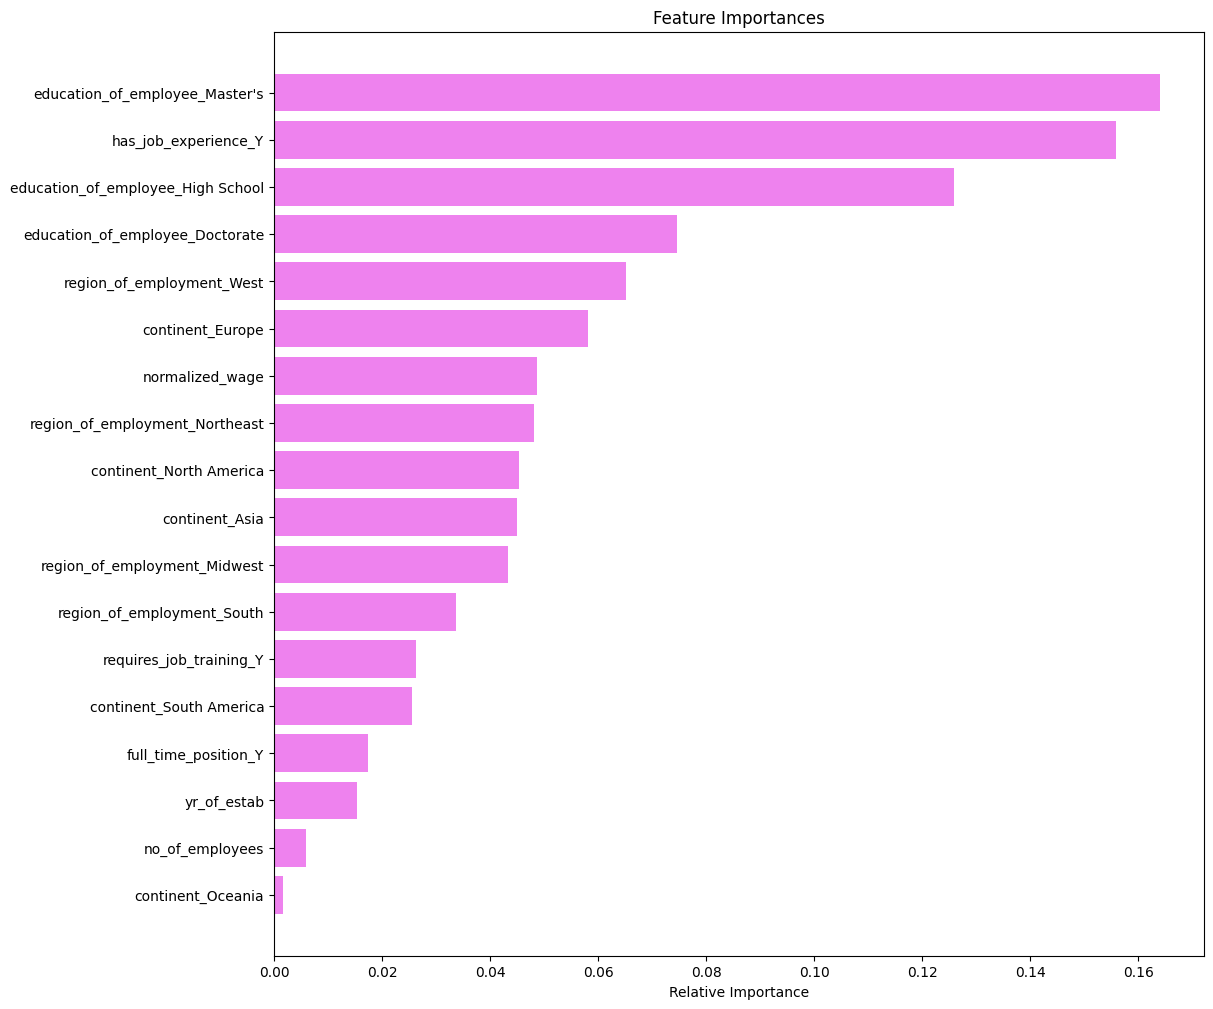

In [160]:
feature_names = X_train.columns
importances = tuned_gbm_over.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Education of employees and job experience are the most important features for making predictions.

## Insights and Recommended profile for visa certification

Applicants are more likely to get certified if they have below characteristics.
* Education Level (Masters or doctorate)
* Job Experience ( Relevant job experience is preferred)
* If the region of employment is West or Northeast USA, shows higher approval rates.
* Higher wage also suggest better roles which leads to approval
* If continent of origin is North America or Europe, suggests higher approval rates
* Full time jobs and no job trainings required can also lead to higher approval rates


## Conclusions

* We have selected the Gradient model trained on oversampled data as our model for Visa predictions.
* We have identified a suitable profile that will also likely get Visa Certified